In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-08-21 11:25:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-08-21 11:25:07 (117 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len - 1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences = True))) # An LSTM Layer
model.add(Dropout(0.2)) # A dropout layer
model.add(LSTM(100)) # Another LSTM Layer
model.add(Dense(total_words/2, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))) # A Dense Layer including regularizers
model.add(Dense(total_words, activation = 'softmax')) # A Dense Layer
# Pick an optimizer 
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # Pick a loss function and an optimizer
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [6]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

W0821 11:33:27.815165 139679729997696 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 6.9108 - acc: 0.0208
Epoch 2/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.4973 - acc: 0.0217
Epoch 3/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.3763 - acc: 0.0244
Epoch 4/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.2561 - acc: 0.0305
Epoch 5/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.1716 - acc: 0.0353
Epoch 6/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.0945 - acc: 0.0385
Epoch 7/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.0183 - acc: 0.0407
Epoch 8/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 5.9328 - acc: 0.0438
Epoch 9/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 5.8368 - acc: 0.0484
Epoch 10/100
15462/15462 [==============================] - 27s 2ms/sampl

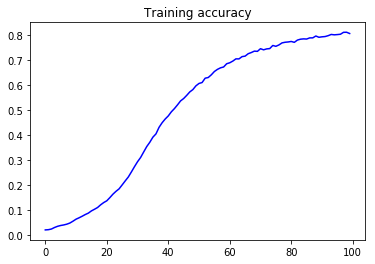

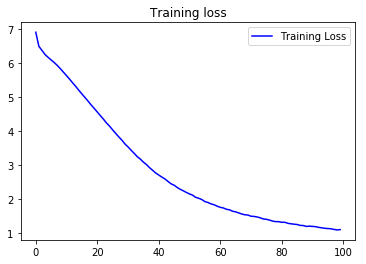

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope thy fair enjoys my pride lies show thee thee still free free free ' seen grow new hate live go shall die die him ' so view thought bold did make good cross slain grow of woe skill can ride 'will' ill hate on in men read burn days increase find see such dead near slain date new grow leaves sit grow mother mother back do crowned burn were about night are seen gone live days we lies free forth none prove young behind days do cherish back dead gone did stand of shouldst approve thee back back now brought
